In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from datetime import datetime

In [2]:
Modelo = pd.read_csv('C:\\Users\Lina_\\OneDrive\\Escritorio\\ProyectoFinal\\Semana 3\\VentasAnuales.csv', sep=',')

In [3]:
Modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VentasAnuales  3 non-null      float64
 1   año            3 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [4]:
Modelo

,VentasAnuales,año
0,6.155807e+06,2017
1,7.386051e+06,2018
2,4.978592e+04,2016


In [5]:
x = Modelo.año
y = Modelo.VentasAnuales

To correctly select the degree of the parabola, we will graph the fit of the model to our data for each of the degrees.

In [6]:
def fx (x1, coef):
    fx = 0
    n = len(coef) -1
    for p in coef:
        fx =  fx + p*x1**n
        n = n - 1
    return fx

para grado 0 la prediccion es de 4530547.900002419


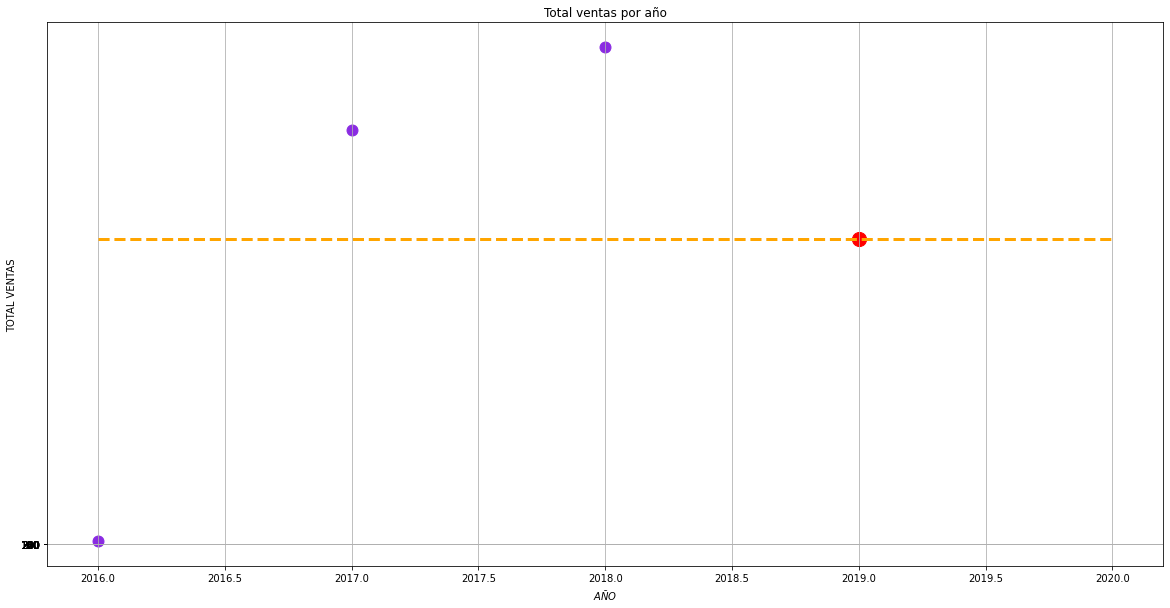

para grado 1 la prediccion es de 11866812.780010223


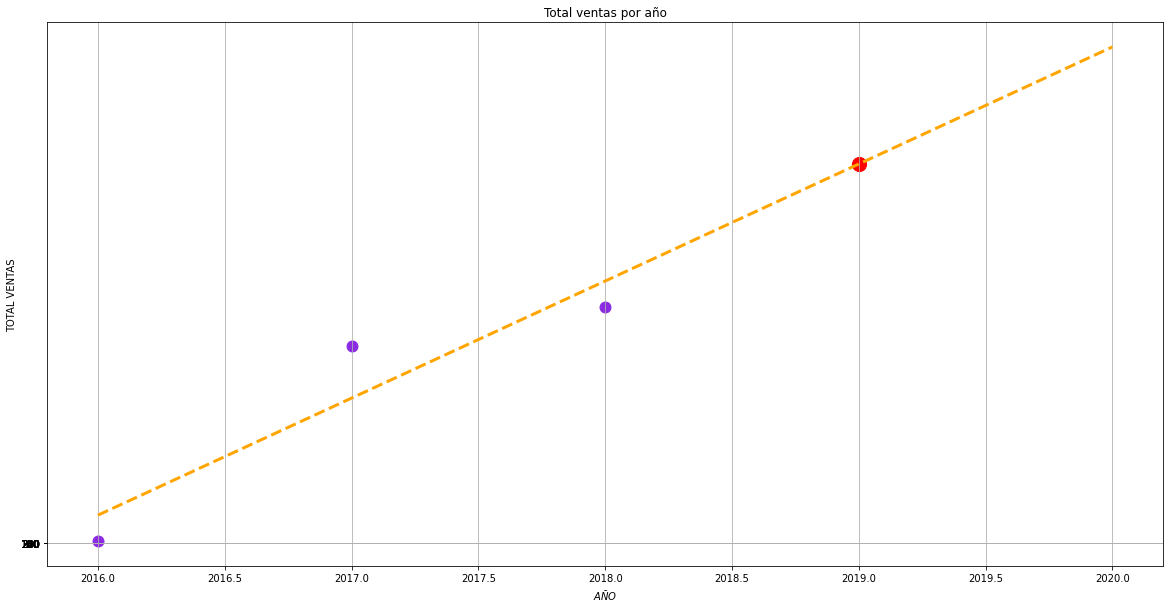

para grado 2 la prediccion es de 3740517.392578125


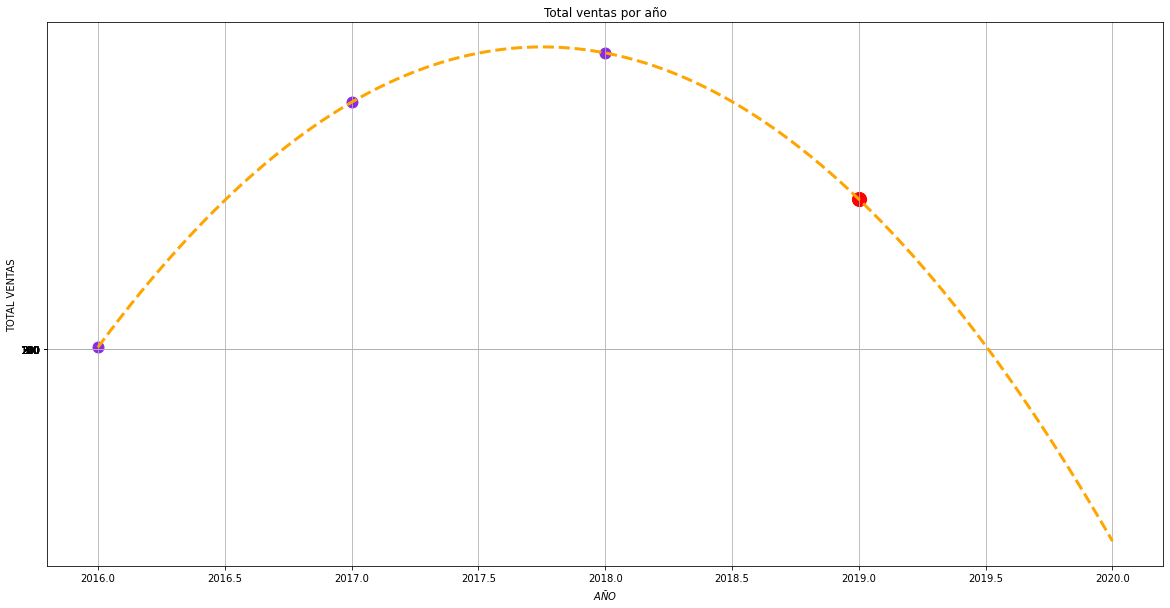

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 3 la prediccion es de 3736890.283203125


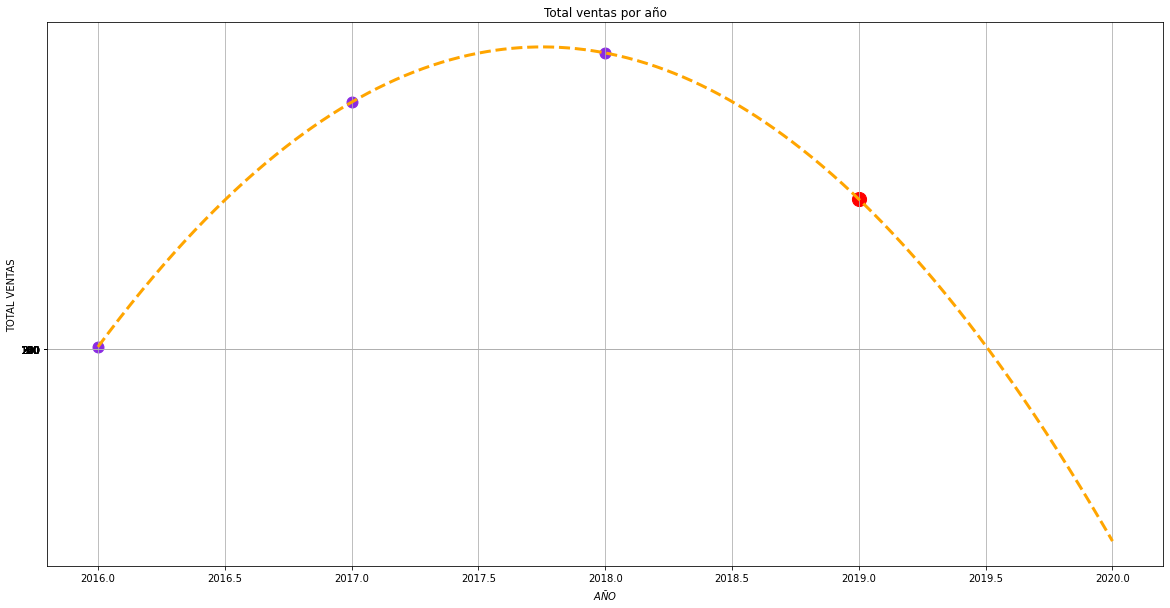

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 4 la prediccion es de 3733260.0532226562


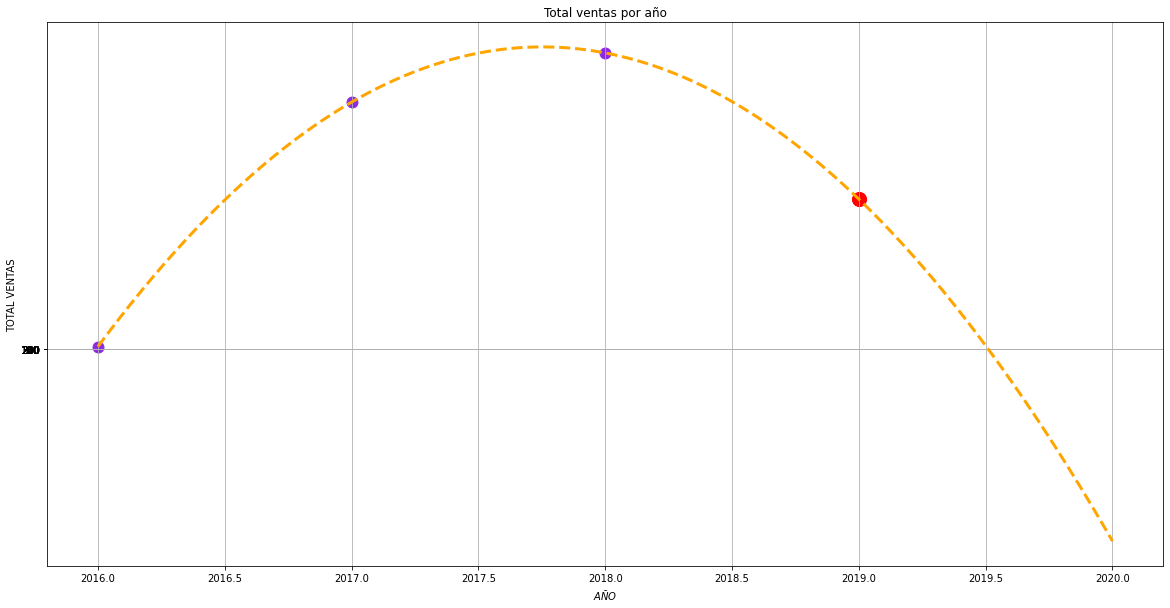

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 5 la prediccion es de 3729626.6892089844


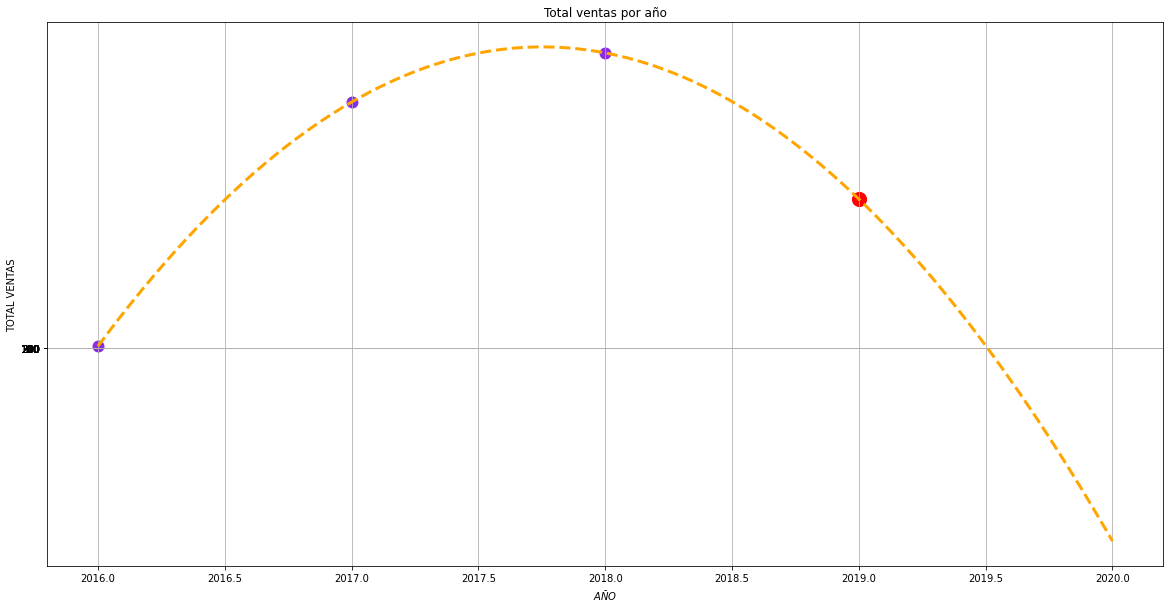

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 6 la prediccion es de 3725990.1850585938


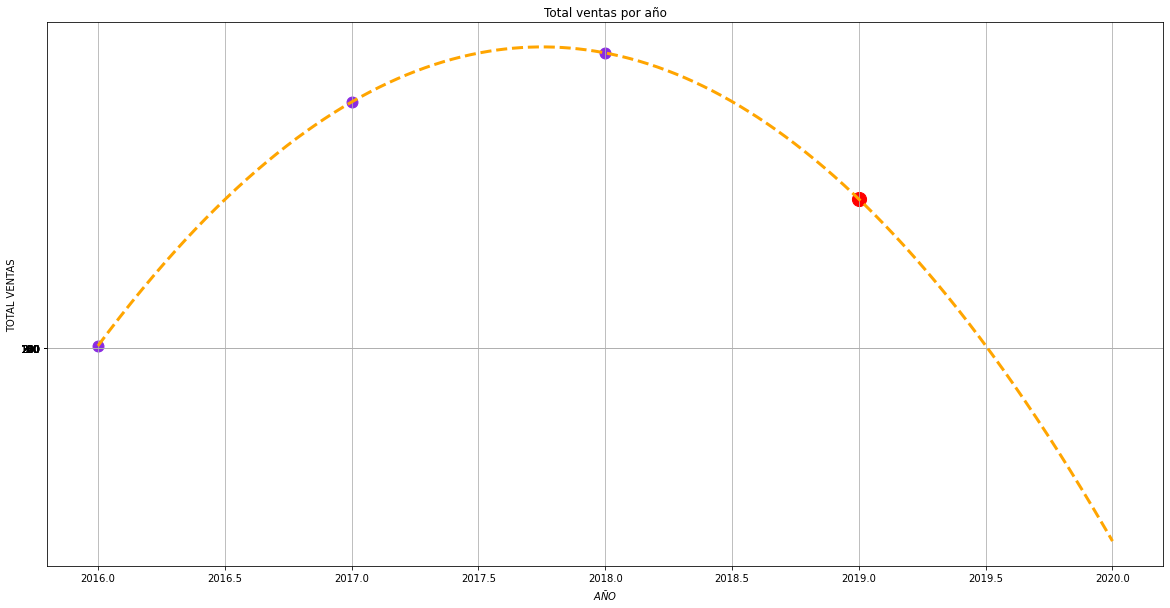

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 7 la prediccion es de 3722350.5334472656


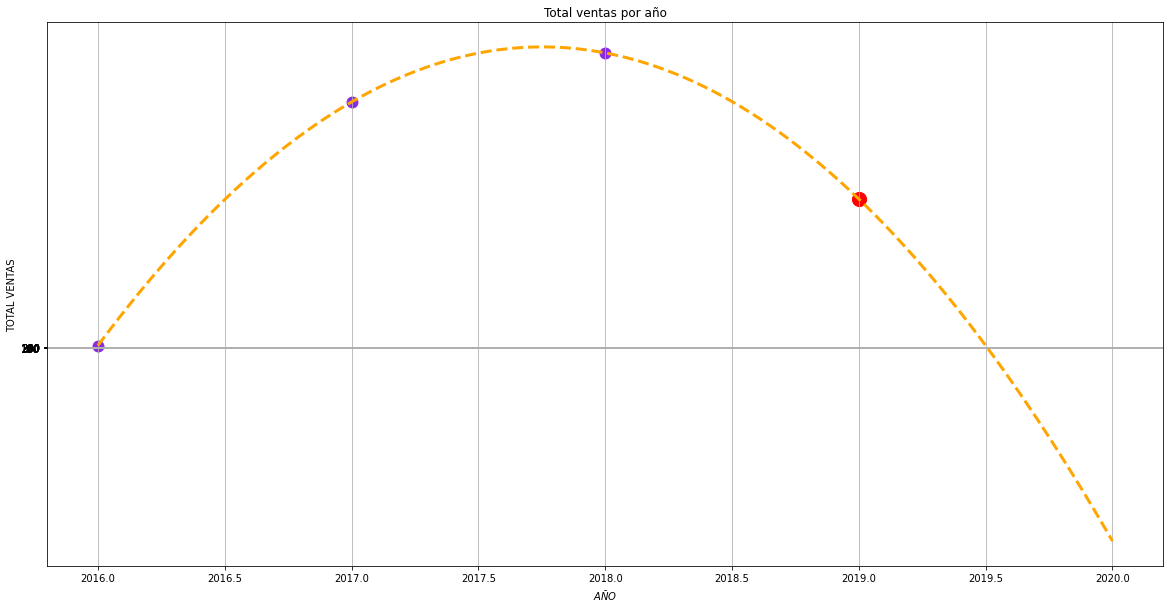

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 8 la prediccion es de 3718707.7368164062


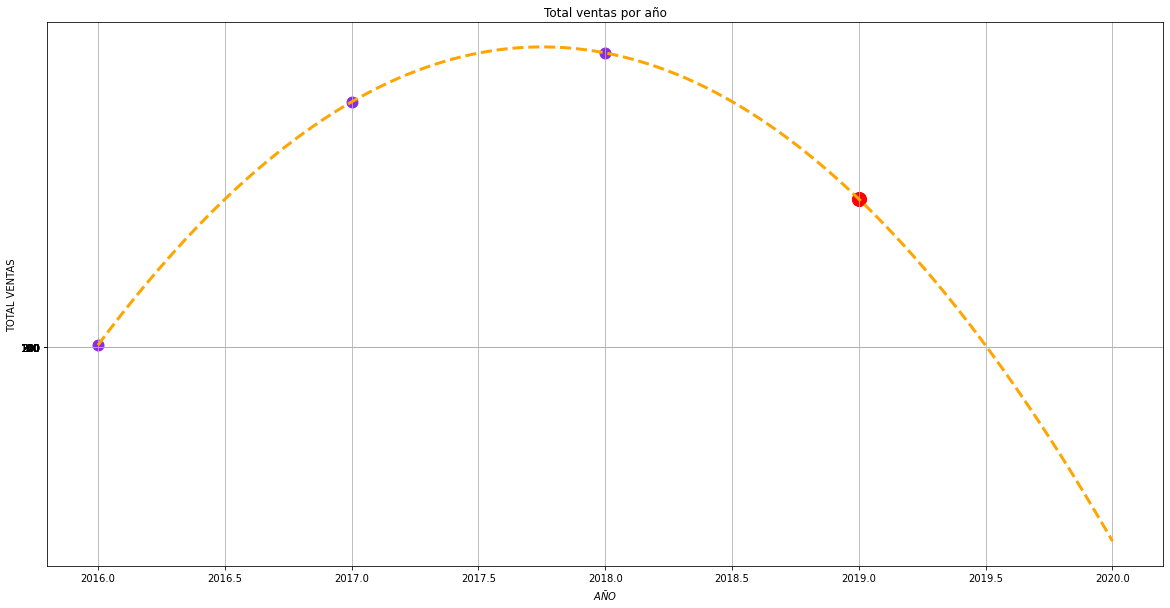

c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 9 la prediccion es de 3715061.794128418


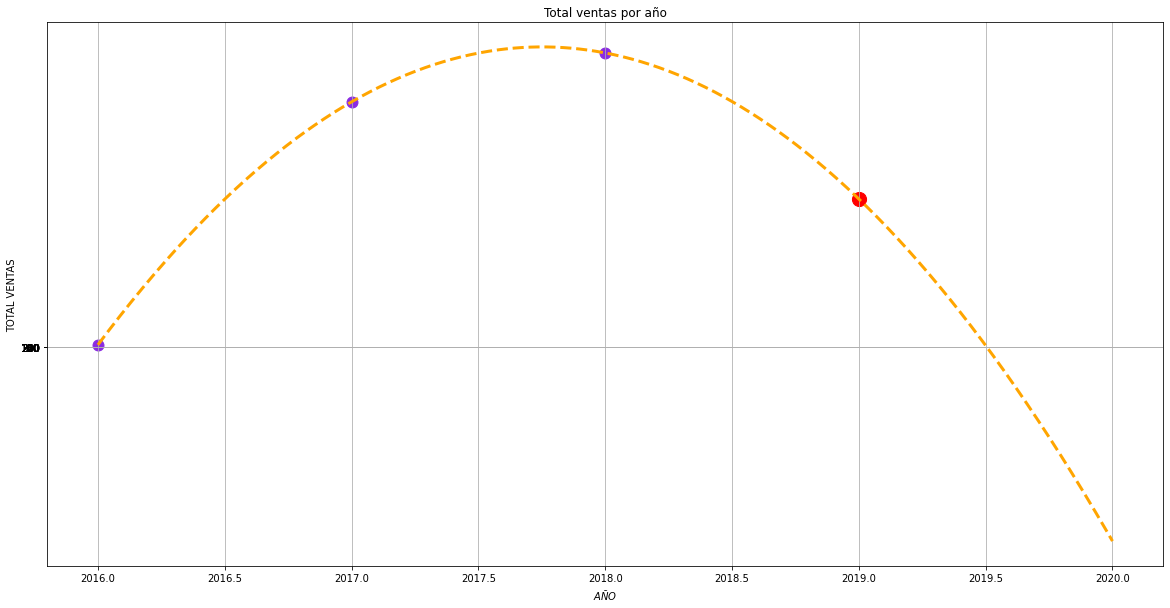

In [7]:
año = 2019
for i in range(0,10):
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef,año)

    print(f'para grado {i} la prediccion es de {p}')
    x1 = np.linspace(2016, año +1, 1000)
    y1 = fx(x1, coef)
    plt.figure(figsize=[20,10])
    plt.title("Total ventas por año")

    plt.scatter(x,y, s=120, c='blueviolet')
    plt.plot(x1, y1, '--', linewidth=3, color='orange')
    plt.scatter(año, p ,s=200, c='red')
    plt.yticks(range(100,320,20))
    plt.grid('on')
    ax=plt.gca()
    ax.set_xlabel('$AÑO$')
    ax.set_ylabel('TOTAL VENTAS')
    plt.show()

According to the graphs, the degree that best fits our dataset is 6, we are going to use this degree to predict

We calculate the MSE and R2 for our prediction

In [8]:
año = 2019
coef = np.polyfit(x,y,6)
p = np.polyval(coef,año)
print(f'El valor de ventas anuales para el año ingresado es: {p}')

El valor de ventas anuales para el año ingresado es: 3725990.1850585938


c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
y_pred_vec = np.array([])
aproxi = np.array([])
for i in range(0,7):
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef,año)
    aproxi = np.append(aproxi, p)

    y_pred_vec = np.array([])
    for j in x:
        y_pred = np.polyval(coef,j)
        y_pred_vec = np.append(y_pred_vec, y_pred)

    MSE = mean_squared_error(y, y_pred_vec)
    r2 = r2_score(y, y_pred_vec) 
print('El coeficiente de determinación del regresor es:', r2)
print(f'Para grado {i} el MSE es de: {MSE}')

El coeficiente de determinación del regresor es: 1.0
Para grado 6 el MSE es de: 1.1676670687879543e-07


c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Lina_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
